# IMPORT LIBRARIES AND DATA

In [ ]:
!pip install tensorflow==2.16.0rc0
!pip install volumentations-3D
!PYTHONHASHSEED=0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 43.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
# Import other modules
from matplotlib import pyplot as plt
import zipfile
from shutil import copyfile
from time import time
import numpy as np
import pandas as pd
import random as python_random
import os
import shutil
import glob
from volumentations import *

# Import TensorFlow/Keras
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, Dropout, Activation, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, Conv3DTranspose, MaxPooling3D, concatenate, Dropout, Activation, BatchNormalization, GroupNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
import tensorflow.keras.backend as K


from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Zip file's path on Gdrive
drive_zip_path = '/content/gdrive/MyDrive/DL_Project/data/128.zip'
local_extract_path = '/content/Training_Data'
os.makedirs(local_extract_path, exist_ok=True
            )
# Unzip on local directory
with zipfile.ZipFile(drive_zip_path, 'r') as zip_ref:
    zip_ref.extractall(local_extract_path)

print("Decompressione completata.")

Decompressione completata.


In [ ]:
train_img_dir = "/content/Training_Data/X_train/"
train_mask_dir = "/content/Training_Data/Y_train/"
train_img_list = sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

val_img_dir = "/content/Training_Data/X_val/"
val_mask_dir = "/content/Training_Data/Y_val/"
val_img_list = sorted(os.listdir(val_img_dir))
val_mask_list = sorted(os.listdir(val_mask_dir))

# DATA AUGMENTATION

In [ ]:
def get_augmentation(volume_size):
    return Compose([
        Rotate((-30, 30), (-30, 30), (-30, 30), p = 1),
        RandomCropFromBorders(crop_value = 0.1, p = 1),
        ElasticTransform((0, 0.25), interpolation = 2, p = 1),
        Resize(volume_size, interpolation = 1, resize_type = 0, always_apply = True, p = 1.0),
        Flip(0, p = 0.5),
        Flip(1, p = 0.5),
        Flip(2, p = 0.5),
        RandomRotate90(p = 1),
    ], p = 1.0)

augmentation = get_augmentation((128,128,128))

def apply_augmentation(image, mask, augmentation):
  augmented = augmentation(image = image, mask = mask)
  augmented_image = augmented['image']
  augmented_mask = augmented['mask']

  return augmented_image, augmented_mask


In [ ]:
output_dir_x = 'Training_Data/augmented_x/'
output_dir_y = 'Training_Data/augmented_y/'

os.makedirs(output_dir_x, exist_ok = True)
os.makedirs(output_dir_y, exist_ok = True)

In [ ]:
for idx, name in enumerate(train_img_list):

  x_path = os.path.join(train_img_dir, train_img_list[idx])
  y_path = os.path.join(train_mask_dir, train_mask_list[idx])

  x_data = np.load(x_path)
  y_data = np.load(y_path)

  base_name = os.path.basename(name)
  number = base_name.split('_')[1].split('.')[0]

  augmented_x1, augmented_y1 = apply_augmentation(x_data, y_data, augmentation)
  #augmented_x2, augmented_y2 = apply_augmentation(x_data, y_data, augmentation)

  augmented_x_path1 = os.path.join(output_dir_x, f'augmented(1)_image_{number}.npy')
  augmented_y_path1 = os.path.join(output_dir_y, f'augmented(1)_mask_{number}.npy')

  #augmented_x_path2 = os.path.join(output_dir_x, f'augmented(2)_image_{number}.npy')
  #augmented_y_path2 = os.path.join(output_dir_y, f'augmented(2)_mask_{number}.npy')

  np.save(augmented_x_path1, augmented_x1)
  np.save(augmented_y_path1, augmented_y1)

  print(number)

  #np.save(augmented_x_path2, augmented_x2)
 # np.save(augmented_y_path2, augmented_y2)

002
003
005
007
008
009
011
013
014
015
021
022
027
028
029
030
033
035
036
037
038
039
041
042
044
045
048
049
050
051
052
053
054
055
059
060
061
062
063
065
066
068
070
072
075
081
082
084
086
088
089
090
092
093
096
097
098
099
100
101
103
104
106
107
108
109
110
111
112
113
115
116
119
120
121
122
123
124
126
128
129
130
131
134
135
136
137
139
140
142
143
144
145
146
147
148
150
151
152
153
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
175
178
179
180
183
184
185
187
188
189
190
191
192
195
197
198
199
200
201
202
203
204
205
206
207
208
209
211
213
214
215
216
217
218
220
222
224
225
227
229
230
231
233
234
235
236
237
238
240
241
242
243
244
245
247
249
252
253
254
255
256
257
258
259
260
261
263
264
265
266
268
270
271
274
275
276
277
278
279
280
281
283
284
285
286
288
289
290
291
292
293
294
296
297
299
300
301
302
303
304
305
306
307
309
310
311
314
315
316
317
319
320
321
327
328
329
330
331
332
333
336
338
339
340
341
343
344
345
346
348
349
350


# TEST

In [ ]:
x1 = sorted(os.listdir(train_img_dir))
y1 = sorted(os.listdir(train_mask_dir))

x1 = ["/content/Training_Data/X_train/" + file for file in x1]
y1 = ["/content/Training_Data/Y_train/" + file for file in y1]

x1[:10]

['/content/Training_Data/X_train/image_002.npy',
 '/content/Training_Data/X_train/image_003.npy',
 '/content/Training_Data/X_train/image_005.npy',
 '/content/Training_Data/X_train/image_007.npy',
 '/content/Training_Data/X_train/image_008.npy',
 '/content/Training_Data/X_train/image_009.npy',
 '/content/Training_Data/X_train/image_011.npy',
 '/content/Training_Data/X_train/image_013.npy',
 '/content/Training_Data/X_train/image_014.npy',
 '/content/Training_Data/X_train/image_015.npy']

In [ ]:
y1[:10]

['/content/Training_Data/Y_train/label_002.npy',
 '/content/Training_Data/Y_train/label_003.npy',
 '/content/Training_Data/Y_train/label_005.npy',
 '/content/Training_Data/Y_train/label_007.npy',
 '/content/Training_Data/Y_train/label_008.npy',
 '/content/Training_Data/Y_train/label_009.npy',
 '/content/Training_Data/Y_train/label_011.npy',
 '/content/Training_Data/Y_train/label_013.npy',
 '/content/Training_Data/Y_train/label_014.npy',
 '/content/Training_Data/Y_train/label_015.npy']

In [ ]:

# Get sorted list of files in the directories
x2 = sorted(os.listdir("/content/Training_Data/augmented_x"))
y2 = sorted(os.listdir("/content/Training_Data/augmented_y"))

# Add the directory path to each filename
X2 = ["/content/Training_Data/augmented_x/" + file for file in x2]
Y2 = ["/content/Training_Data/augmented_y/" + file for file in y2]

# Display the first 10 entries to check
print(X2[:10])
print(Y2[:10])

['/content/Training_Data/augmented_x/augmented(1)_image_002.npy', '/content/Training_Data/augmented_x/augmented(1)_image_003.npy', '/content/Training_Data/augmented_x/augmented(1)_image_005.npy', '/content/Training_Data/augmented_x/augmented(1)_image_007.npy', '/content/Training_Data/augmented_x/augmented(1)_image_008.npy', '/content/Training_Data/augmented_x/augmented(1)_image_009.npy', '/content/Training_Data/augmented_x/augmented(1)_image_011.npy', '/content/Training_Data/augmented_x/augmented(1)_image_013.npy', '/content/Training_Data/augmented_x/augmented(1)_image_014.npy', '/content/Training_Data/augmented_x/augmented(1)_image_015.npy']
['/content/Training_Data/augmented_y/augmented(1)_mask_002.npy', '/content/Training_Data/augmented_y/augmented(1)_mask_003.npy', '/content/Training_Data/augmented_y/augmented(1)_mask_005.npy', '/content/Training_Data/augmented_y/augmented(1)_mask_007.npy', '/content/Training_Data/augmented_y/augmented(1)_mask_008.npy', '/content/Training_Data/augm

In [ ]:
X_files = x1 + X2
Y_files = y1 + Y2

combined = list(zip(X_files, Y_files))
np.random.shuffle(combined)
X_shuffled, Y_shuffled = zip(*combined)

In [ ]:
X_shuffled[:10]

('/content/Training_Data/X_train/image_104.npy',
 '/content/Training_Data/X_train/image_202.npy',
 '/content/Training_Data/augmented_x/augmented(1)_image_254.npy',
 '/content/Training_Data/augmented_x/augmented(1)_image_109.npy',
 '/content/Training_Data/augmented_x/augmented(1)_image_211.npy',
 '/content/Training_Data/augmented_x/augmented(1)_image_048.npy',
 '/content/Training_Data/augmented_x/augmented(1)_image_066.npy',
 '/content/Training_Data/augmented_x/augmented(1)_image_327.npy',
 '/content/Training_Data/X_train/image_304.npy',
 '/content/Training_Data/X_train/image_343.npy')

In [ ]:
Y_shuffled[:10]

('/content/Training_Data/Y_train/label_104.npy',
 '/content/Training_Data/Y_train/label_202.npy',
 '/content/Training_Data/augmented_y/augmented(1)_mask_254.npy',
 '/content/Training_Data/augmented_y/augmented(1)_mask_109.npy',
 '/content/Training_Data/augmented_y/augmented(1)_mask_211.npy',
 '/content/Training_Data/augmented_y/augmented(1)_mask_048.npy',
 '/content/Training_Data/augmented_y/augmented(1)_mask_066.npy',
 '/content/Training_Data/augmented_y/augmented(1)_mask_327.npy',
 '/content/Training_Data/Y_train/label_304.npy',
 '/content/Training_Data/Y_train/label_343.npy')

# DATA GENERATOR

In [ ]:
##### TRAIN DATA
import numpy as np

def load_img_from_paths(paths):
    images = []
    for path in paths:
        image = np.load(path)
        images.append(image)
    images = np.array(images)
    return images

def image_loader_train(x_list, y_list, batch_size=4):
    L = len(x_list)
    while True:
        batch_start = 0
        batch_end = batch_size
        while batch_start < L:
            limit = min(L, batch_end)
            img_batch = load_img_from_paths(x_list[batch_start:limit])
            mask_batch = load_img_from_paths(y_list[batch_start:limit])
            yield (img_batch, mask_batch)
            batch_start += batch_size
            batch_end += batch_size



In [ ]:
############ VALIDATION DATA
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):
        if (image_name.split('.')[1] == 'npy'):

            image = np.load(img_dir + image_name)

            images.append(image)

    images = np.array(images)

    return images


def image_loader_validation(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:

            limit = min(L, batch_end)

            img = load_img(img_dir, img_list[batch_start:limit])
            mask = load_img(mask_dir, mask_list[batch_start:limit])

            yield(img, mask)

        batch_start += batch_size
        batch_end += batch_size


#  FIXED PARAMETERS

In [ ]:
#Compute weight of classes

columns = ['0','1', '2', '3']
df = pd.DataFrame(columns=columns)
train_mask_list = sorted(glob.glob('/content/Training_Data/Y_train/*.npy'))
for img in range(len(train_mask_list)):

  temp_image=np.load(train_mask_list[img])
  temp_image = np.argmax(temp_image, axis=3)
  val, counts = np.unique(temp_image, return_counts=True)

  conts_dict = {str(i): 0 for i in range(4)}
  for v, c in zip(val, counts):
    conts_dict[str(v)] = c

  row_df = pd.DataFrame([conts_dict])

  # add new row
  df = pd.concat([df, row_df], ignore_index=True)

label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['2'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4

wt0 = round((total_labels/(n_classes*label_0)), 2) #round to 2 decimals
wt1 = round((total_labels/(n_classes*label_1)), 2)
wt2 = round((total_labels/(n_classes*label_2)), 2)
wt3 = round((total_labels/(n_classes*label_3)), 2)

print(wt0, wt1, wt2, wt3)

0.26 8.56 29.69 27.28


In [ ]:
CFC_loss = keras.losses.CategoricalFocalCrossentropy(alpha = [wt0, wt1, wt2, wt3])

In [ ]:
IoU_0 = keras.metrics.OneHotIoU(num_classes = 4, target_class_ids = [0])
IoU_1 = keras.metrics.OneHotIoU(num_classes = 4, target_class_ids = [1])
IoU_2 = keras.metrics.OneHotIoU(num_classes = 4, target_class_ids = [2])
IoU_3 = keras.metrics.OneHotIoU(num_classes = 4, target_class_ids = [3])

Mean_IoU = keras.metrics.OneHotMeanIoU(num_classes = 4)

metrics = ["accuracy",  Mean_IoU, IoU_0, IoU_1, IoU_2, IoU_3]

In [ ]:
#Define the optimizer
batch_size = 4

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 5e-4,
    decay_steps  = (len(train_img_list) // 4),
    decay_rate = 0.985)

optim = keras.optimizers.Adam(0.001)

# ARCHITECTURE

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, Conv3DTranspose, MaxPooling3D, concatenate, Dropout, Activation, GroupNormalization

def conv_block(input, n_filters):

    x = Conv3D(n_filters, 3, padding='same')(input)
    x = GroupNormalization(groups = 32)(x)
    x = Activation('relu')(x)

    x = Conv3D(n_filters, 3, padding='same')(x)
    x = GroupNormalization(groups = 32)(x)
    x = Activation('relu')(x)

    return x

def encoder_block(input, num_filters):

    x = conv_block(input, num_filters)
    p = MaxPooling3D((2, 2, 2))(x)

    return x, p

def decoder_block(input, skip_features, num_filters):

    x = Conv3DTranspose(num_filters, (2, 2, 2), strides=(2, 2, 2), padding = 'same')(input)
    x = concatenate([x, skip_features])
    x = conv_block(x, num_filters)

    return x


In [ ]:
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)
    s4, p4 = encoder_block(p3, 256)

    b1 = conv_block(p4, 512)

    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)

    outputs = Conv3D(n_classes, 1, padding='same', activation='softmax')(d4)

    model = Model(inputs, outputs, name='3D_U-Net')
    return model

input_shape = (128, 128, 128, 4)
n_classes = 4

model = build_unet(input_shape, n_classes)
model.compile(optimizer = optim, loss = CFC_loss, metrics = metrics)
model.summary()


Model: "3D_U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 128,  │              0 │ -                      │
│ (InputLayer)              │ 4)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_19 (Conv3D)        │ (None, 128, 128, 128,  │          3,488 │ input_layer_1[0][0]    │
│                           │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ group_normalization_18    │ (None, 128, 128, 128,  │             64 │ conv3d_19[0][0]        │
│ (GroupNormalization)      │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_18             │ (None, 128, 128, 128,  │              0 │ group_normalization_1… │
│ (Activation)              │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_20 (Conv3D)        │ (None, 128, 128, 128,  │         27,680 │ activation_18[0][0]    │
│                           │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ group_normalization_19    │ (None, 128, 128, 128,  │             64 │ conv3d_20[0][0]        │
│ (GroupNormalization)      │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_19             │ (None, 128, 128, 128,  │              0 │ group_normalization_1… │
│ (Activation)              │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_4           │ (None, 64, 64, 64, 32) │              0 │ activation_19[0][0]    │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_21 (Conv3D)        │ (None, 64, 64, 64, 64) │         55,360 │ max_pooling3d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ group_normalization_20    │ (None, 64, 64, 64, 64) │            128 │ conv3d_21[0][0]        │
│ (GroupNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_20             │ (None, 64, 64, 64, 64) │              0 │ group_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_22 (Conv3D)        │ (None, 64, 64, 64, 64) │        110,656 │ activation_20[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ group_normalization_21    │ (None, 64, 64, 64, 64) │            128 │ conv3d_22[0][0]        │
│ (GroupNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_21             │ (None, 64, 64, 64, 64) │              0 │ group_normalization_2… │
│ (Activation)         

 Total params: 22,583,908 (86.15 MB)

 Trainable params: 22,583,908 (86.15 MB)

 Non-trainable params: 0 (0.00 B)

# FIT

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define path to save model
checkpoint_path = "content/best_model3D.h5.keras"

# Callback to save best model based on validation loss
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Define callbackf for early stopping
early_stopping_callback = EarlyStopping(
    monitor = 'val_loss',    # MonitorTrack validation loss
    patience = 10,           # Max number of epoch without improvement
    restore_best_weights = True
)

csv = CSVLogger("/content/gdrive/MyDrive/DL_Project/history_3dDataAugm.csv")

In [ ]:
batch_size = 4

steps_per_epoch = len(train_img_list)*2//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

train_img_datagen = image_loader_train(X_shuffled, Y_shuffled, batch_size)
val_img_datagen = image_loader_validation(val_img_dir, val_img_list, val_mask_dir, val_mask_list, batch_size)

In [ ]:
train_img_dir = "/content/Training_Data/X_train/"
train_mask_dir = "/content/Training_Data/Y_train/"
train_img_list = sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

val_img_dir = "/content/Training_Data/X_val/"
val_mask_dir = "/content/Training_Data/Y_val/"
val_img_list = sorted(os.listdir(val_img_dir))
val_mask_list = sorted(os.listdir(val_mask_dir))

In [ ]:
history = model.fit(
    train_img_datagen,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=val_img_datagen,
    validation_steps=val_steps_per_epoch,
    callbacks=[checkpoint_callback, early_stopping_callback, csv]
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6596 - loss: 0.4910 - one_hot_io_u: 0.2441 - one_hot_io_u_1: 0.3407 - one_hot_io_u_2: 0.1752 - one_hot_io_u_3: 0.3083 - one_hot_mean_io_u: 0.2671
Epoch 1: val_loss improved from inf to 0.39954, saving model to content/best_model3D.h5.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.6604 - loss: 0.4900 - one_hot_io_u: 0.2441 - one_hot_io_u_1: 0.3405 - one_hot_io_u_2: 0.1755 - one_hot_io_u_3: 0.3087 - one_hot_mean_io_u: 0.2672 - val_accuracy: 0.8942 - val_loss: 0.3995 - val_one_hot_io_u: 0.5511 - val_one_hot_io_u_1: 0.1727 - val_one_hot_io_u_2: 0.2393 - val_one_hot_io_u_3: 0.1652 - val_one_hot_mean_io_u: 0.2821
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9214 - loss: 0.2334 - one_hot_io_u: 0.3859 - one_hot_io_u_1: 0.3658 - one_hot_io_u_2: 0.2094 - one_hot_io_u_3: 0.4178 - one_hot_mean_io_u: 0.3447
Epoch 2: val_loss improved from 0.39954 to 0.37486, saving model to content/best_model3D.h5.ke

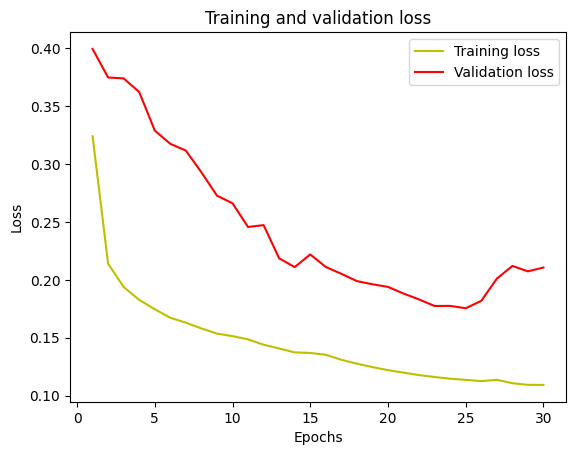

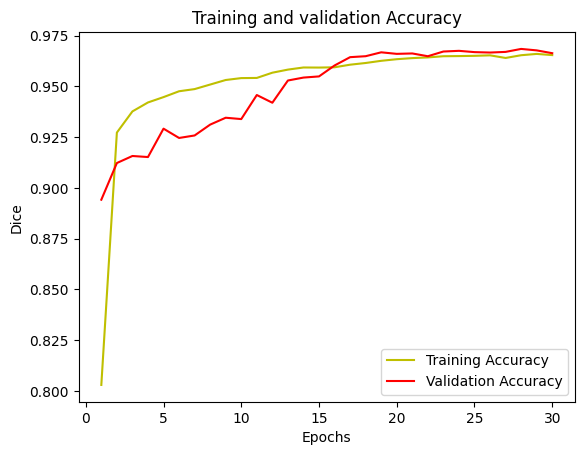

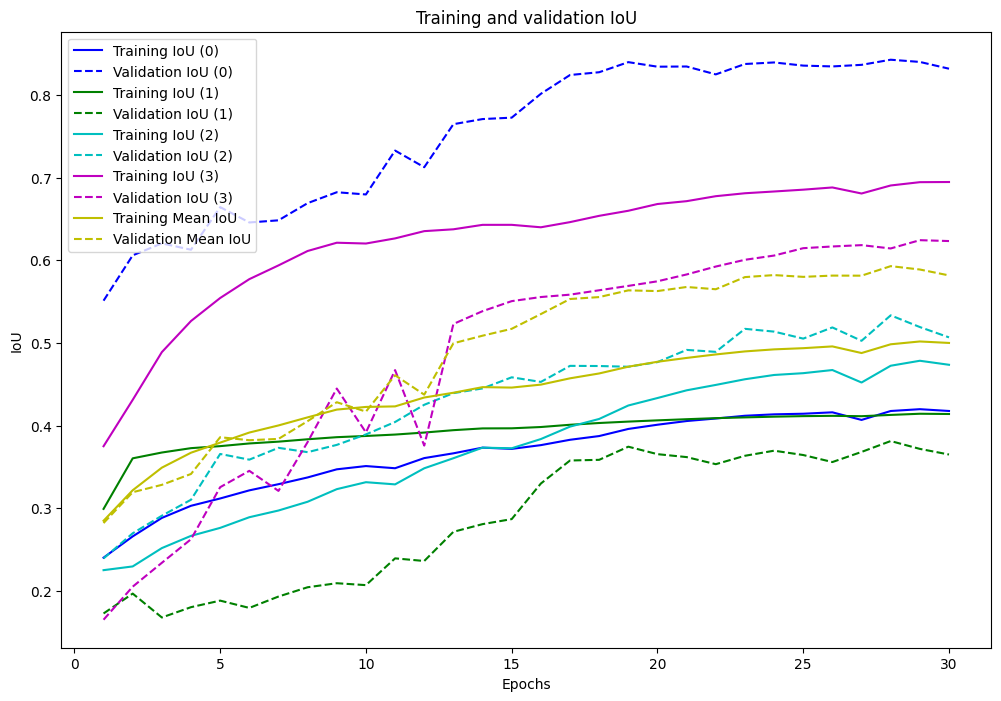

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Dice')
plt.legend()
plt.show()



a1 = history.history['one_hot_io_u']
a2 = history.history['val_one_hot_io_u']
b1 = history.history['one_hot_io_u_1']
b2 = history.history['val_one_hot_io_u_1']
c1 = history.history['one_hot_io_u_2']
c2 = history.history['val_one_hot_io_u_2']
d1 = history.history['one_hot_io_u_3']
d2 = history.history['val_one_hot_io_u_3']
e1 = history.history['one_hot_mean_io_u']
e2 = history.history['val_one_hot_mean_io_u']

colors = ['b', 'g', 'c', 'm', 'y', 'k']
line_styles = ['-', '--', '-.', ':']

plt.figure(figsize=(12, 8))

plt.plot(epochs, a1, color=colors[0], linestyle=line_styles[0], label='Training IoU (0)')
plt.plot(epochs, a2, color=colors[0], linestyle=line_styles[1], label='Validation IoU (0)')
plt.plot(epochs, b1, color=colors[1], linestyle=line_styles[0], label='Training IoU (1)')
plt.plot(epochs, b2, color=colors[1], linestyle=line_styles[1], label='Validation IoU (1)')
plt.plot(epochs, c1, color=colors[2], linestyle=line_styles[0], label='Training IoU (2)')
plt.plot(epochs, c2, color=colors[2], linestyle=line_styles[1], label='Validation IoU (2)')
plt.plot(epochs, d1, color=colors[3], linestyle=line_styles[0], label='Training IoU (3)')
plt.plot(epochs, d2, color=colors[3], linestyle=line_styles[1], label='Validation IoU (3)')
plt.plot(epochs, e1, color=colors[4], linestyle=line_styles[0], label='Training Mean IoU')
plt.plot(epochs, e2, color=colors[4], linestyle=line_styles[1], label='Validation Mean IoU')

plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

In [ ]:
# Salva il modello completo
model.save('/content/gdrive/MyDrive/DL_Project/complete_model3D.h5')
